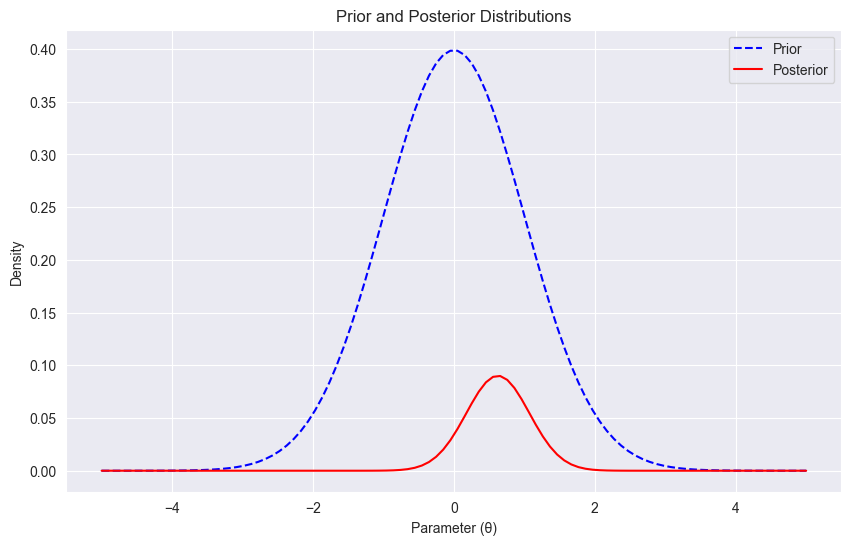

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate prior (Normal distribution as a prior)
mu_prior = 0  # Prior mean
sigma_prior = 1  # Prior standard deviation
x = np.linspace(-5, 5, 100)
prior = (1 / (sigma_prior * np.sqrt(2 * np.pi))) * np.exp(-(x - mu_prior)**2 / (2 * sigma_prior**2))

# Assume observed data (likelihood - Normal distribution)
data = np.array([0.2, 0.5, 0.7, 1.0, 1.5])  # Sample data
likelihood_mean = np.mean(data)  # Mean of the data
likelihood_std = 0.5  # Assume a standard deviation for the likelihood
likelihood = (1 / (likelihood_std * np.sqrt(2 * np.pi))) * np.exp(-(x - likelihood_mean)**2 / (2 * likelihood_std**2))

# Calculate posterior (Simple example: combination of prior and likelihood)
posterior = prior * likelihood  # Multiplying prior and likelihood to get the unnormalized posterior
posterior /= np.sum(posterior)  # Normalize posterior

# Plotting the prior, likelihood, and posterior
plt.figure(figsize=(10, 6))
plt.plot(x, prior, label="Prior", color='blue', linestyle='--')
#plt.plot(x, likelihood, label="Likelihood", color='green', linestyle='-.')
plt.plot(x, posterior, label="Posterior", color='red')
plt.legend()
plt.xlabel("Parameter (θ)")
plt.ylabel("Density")
plt.title("Prior and Posterior Distributions")
plt.grid(True)
plt.show()

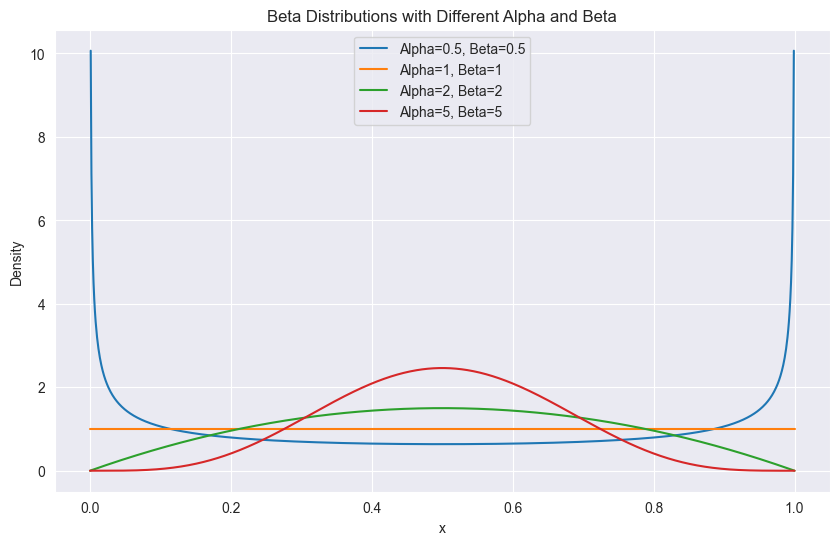

In [3]:
from scipy.stats import beta

# Range of x values between 0 and 1
x = np.linspace(0, 1, 1000)

# Different values of alpha and beta
alpha_values = [0.5, 1, 2, 5]
beta_values = [0.5, 1, 2, 5]

# Plot Beta distributions for different alpha and beta
plt.figure(figsize=(10, 6))

for alpha, beta_param in zip(alpha_values, beta_values):
    y = beta.pdf(x, alpha, beta_param)  # PDF of the Beta distribution
    plt.plot(x, y, label=f'Alpha={alpha}, Beta={beta_param}')

plt.title('Beta Distributions with Different Alpha and Beta')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


$$
\begin{aligned}
    P^{(1)} (x,A) &= P(x,A) \\
    P^{(n)} (x,A) &= \int_{\mathbb{R}^d} P^{(n-1)}(x,dy) P(y,A) \\
    \pi^*(A) &= \lim_{n \rightarrow \infty } P^{(n)} (x,A) \\
\end{aligned}
$$

Transition kernel is represented as:

$$
\begin{aligned}
    P(x,dy) &= p(x,y) \mathbb{1}(x \notin dy)dy + r(x) \mathbb{1}(x \in dy) \\
    r(x) &= 1 - \int_{\mathbb{R}^d} p(x,y) dy
\end{aligned}
$$

If the reversibility constraint is fulfilled:

$$
\begin{aligned}
    \pi(x) p(x,y) &= \pi(y) p(y,x)
\end{aligned}
$$

If  p(x,y)  adheres to this constraint, then $\pi(\cdot)$  is the stationary distribution of  $P(x, \cdot)$.

Considering the following derivation:

$$
\begin{aligned}
    \int_{\mathbb{R}^d} P(x,A) \pi(x) dx &= \int_{\mathbb{R}^d}
    \left[ \int_A p(x,y) 1(x \notin dy) dy + r(x) 1(x \in dy) \right] \pi(x) dx \\
    &= \int_{\mathbb{R}^d} \left[ \int_A p(x,y) 1(x \notin dy) dy \right] \pi(x) dx + \int_{\mathbb{R}^d} \left[ r(x) 1(x \in dy) \right] \pi(x) dx \\
    &= \int_{\mathbb{R}^d} \left[ \int_A p(x,y) 1(x \notin dy) dy \right] \pi(x) dx + \int_A r(x) \pi(x) dx \\
    &= \int_A \left[ \int_{\mathbb{R}^d} p(x,y) \pi(x) dx \right] 1(x \notin dy) dy + \int_A r(x) \pi(x) dx
\end{aligned}
$$

By reversibility constraint:

$$
\begin{aligned}
    &= \int_A \left[ \int_{\mathbb{R}^d} p(y,x) \pi(y) dy \right] 1(x \notin dy) dy + \int_A r(x) \pi(x) dx\\
    &= \int_A (1 - r(y)) \pi(y) dy + \int_A r(x) \pi(x) dx\\
    &= \int_A \pi(x) dx\\
\end{aligned}
$$

